# Run A Mixed Effects Model

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/master_list_proper_subjects.csv'

In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/analyses/palm'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,subject,Age,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Memory_Network_R,Subiculum_Grey_Matter,...,Standardized_Age,Standardized_Percent_Improvement,Standardized_Subiculum_Connectivity,Standardized_Subiculum_Grey_Matter,Standardized_Subiculum_White_Matter,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Disease,Cohort,Inclusion_Cohort
0,101,62.0,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,0.418688,1.646994,...,0.289341,0.289341,-1.179578,1.970962,0.663981,1.773701,1.789087,Alzheimer,1,1
1,102,77.0,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,0.417569,-0.865158,...,-0.016378,-0.016378,-1.635523,-0.125938,-1.611307,-0.272553,-1.093456,Alzheimer,1,1
2,103,76.0,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,0.500706,0.319460,...,-0.888064,-0.888064,-0.524419,0.862866,-0.734373,-0.463295,0.143505,Alzheimer,1,1
3,104,65.0,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,0.455778,-0.440643,...,-1.921065,-1.921065,-0.857915,0.228406,-0.052972,-0.579749,0.126248,Alzheimer,1,1
4,105,50.0,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,0.455764,-0.328427,...,0.512509,0.512509,-1.055024,0.322072,-0.128024,-1.856148,0.144737,Alzheimer,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,51,68.0,NaN,NaN,0.165000,29.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1
102,52,53.0,NaN,NaN,0.089500,15.900000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1
103,53,59.0,NaN,NaN,0.171000,30.100000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1
104,55,62.0,NaN,NaN,0.167000,29.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'Age', 'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort',
       'Inclusion_Cohort'],
      dtype='object')

In [5]:
drop_list = ['Age', 'Z_Scored_Percent_Cognitive_Improvement']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Memory_Network_R,Subiculum_Grey_Matter,...,Standardized_Age,Standardized_Percent_Improvement,Standardized_Subiculum_Connectivity,Standardized_Subiculum_Grey_Matter,Standardized_Subiculum_White_Matter,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Disease,Cohort,Inclusion_Cohort
0,101,62.0,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,0.418688,1.646994,...,0.289341,0.289341,-1.179578,1.970962,0.663981,1.773701,1.789087,Alzheimer,1,1
1,102,77.0,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,0.417569,-0.865158,...,-0.016378,-0.016378,-1.635523,-0.125938,-1.611307,-0.272553,-1.093456,Alzheimer,1,1
2,103,76.0,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,0.500706,0.319460,...,-0.888064,-0.888064,-0.524419,0.862866,-0.734373,-0.463295,0.143505,Alzheimer,1,1
3,104,65.0,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,0.455778,-0.440643,...,-1.921065,-1.921065,-0.857915,0.228406,-0.052972,-0.579749,0.126248,Alzheimer,1,1
4,105,50.0,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,0.455764,-0.328427,...,0.512509,0.512509,-1.055024,0.322072,-0.128024,-1.856148,0.144737,Alzheimer,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,36,60.0,0.191118,0.000000,0.130000,20.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1
92,40,77.0,0.191118,0.000000,0.172000,29.600000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1
96,45,60.0,0.191118,0.000000,0.138000,24.200000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1
98,48,73.0,-1.847471,-0.500000,0.147000,25.300000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,3,1


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['subject', 'Age', 'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort',
       'Inclusion_Cohort'],
      dtype='object')

Set the parameters for dropping rows

In [8]:
column = 'Cohort'  # The column you'd like to evaluate
condition = 'equal'  # The condition to check ('equal', 'above', 'below')
value = 3  # The value to compare against

In [9]:
data_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Memory_Network_R,Subiculum_Grey_Matter,...,Standardized_Age,Standardized_Percent_Improvement,Standardized_Subiculum_Connectivity,Standardized_Subiculum_Grey_Matter,Standardized_Subiculum_White_Matter,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Disease,Cohort,Inclusion_Cohort
0,101,62.0,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,0.418688,1.646994,...,0.289341,0.289341,-1.179578,1.970962,0.663981,1.773701,1.789087,Alzheimer,1,1
1,102,77.0,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,0.417569,-0.865158,...,-0.016378,-0.016378,-1.635523,-0.125938,-1.611307,-0.272553,-1.093456,Alzheimer,1,1
2,103,76.0,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,0.500706,0.319460,...,-0.888064,-0.888064,-0.524419,0.862866,-0.734373,-0.463295,0.143505,Alzheimer,1,1
3,104,65.0,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,0.455778,-0.440643,...,-1.921065,-1.921065,-0.857915,0.228406,-0.052972,-0.579749,0.126248,Alzheimer,1,1
4,105,50.0,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,0.455764,-0.328427,...,0.512509,0.512509,-1.055024,0.322072,-0.128024,-1.856148,0.144737,Alzheimer,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,30,58.0,0.106772,-1.388889,-0.590767,18.674670,-0.553686,-0.190240,0.055350,-8.205764,...,1.034438,1.034438,-1.099623,-3.303201,2.909124,-3.303201,2.775495,Parkinson,2,1
69,31,64.0,1.086636,1.449275,-1.065220,15.353030,-0.505577,-0.179074,0.022968,9.086053,...,-0.009451,-0.009451,-1.142557,0.791574,-0.144002,0.791574,-0.544369,Parkinson,2,1
70,33,60.0,0.103418,-1.398601,-1.108473,15.050219,-0.659502,-0.363412,-0.058739,8.416993,...,-0.522107,-0.522107,-0.811944,0.633137,0.522049,0.633137,-1.339117,Parkinson,2,1
72,36,52.0,-0.379443,-2.797203,-0.775406,17.382020,-0.527690,-0.175144,0.043586,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,2,1


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [10]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [11]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column.


,subject,Age,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Memory_Network_R,Subiculum_Grey_Matter,...,Standardized_Age,Standardized_Percent_Improvement,Standardized_Subiculum_Connectivity,Standardized_Subiculum_Grey_Matter,Standardized_Subiculum_White_Matter,Standardized_Subiculum_CSF,Standardized_Subiculum_Total,Disease,Cohort,Inclusion_Cohort
0,0.264560,62.0,0.282711,0.063903,-1.312643,0.244515,0.702870,0.307932,-0.012449,0.024448,...,0.309515,0.309515,-1.258329,1.923460,0.708418,1.778231,1.795626,Alzheimer,-0.751809,NaN
1,0.283364,77.0,-0.027455,-0.283827,-1.796326,0.071993,0.676277,0.331677,-0.017784,-0.591232,...,0.006766,0.006766,-1.730315,-0.157061,-1.610938,-0.238984,-1.159147,Alzheimer,-0.751809,NaN
2,0.302167,76.0,-0.911819,-1.275295,-0.617629,0.492415,0.823749,0.578507,0.378361,-0.300905,...,-0.856449,-0.856449,-0.580121,0.824019,-0.717019,-0.427020,0.108809,Alzheimer,-0.751809,NaN
3,0.320971,65.0,-1.959845,-2.450246,-0.971413,0.366226,0.667801,0.388969,0.164284,-0.487192,...,-1.879413,-1.879413,-0.925350,0.194515,-0.022421,-0.541821,0.091119,Alzheimer,-0.751809,NaN
4,0.339775,50.0,0.509125,0.317738,-1.180513,0.291644,0.094999,0.299008,0.164217,-0.459690,...,0.530515,0.530515,-1.129394,0.287450,-0.098927,-1.800106,0.110072,Alzheimer,-0.751809,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,-1.070514,58.0,0.068440,0.530482,-0.612976,-1.447605,-1.693773,-1.832974,-1.743743,-2.390272,...,1.047371,1.047371,-1.175562,-3.309505,2.997044,-3.226623,2.806750,Parkinson,1.330124,NaN
69,-1.051710,64.0,1.081280,0.596563,-1.092781,-1.594780,-1.578581,-1.798067,-1.898042,1.847617,...,0.013627,0.013627,-1.220006,0.753284,-0.115215,0.810041,-0.596302,Parkinson,1.330124,NaN
70,-1.014102,60.0,0.064974,0.530256,-1.136522,-1.608197,-1.947136,-2.374336,-2.287374,1.683644,...,-0.494049,-0.494049,-0.877762,0.596085,0.563736,0.653853,-1.410964,Parkinson,1.330124,NaN
72,-0.957691,52.0,-0.434137,0.497693,-0.799697,-1.504880,-1.631530,-1.785781,-1.799799,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Parkinson,1.330124,NaN


# 02 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [7]:
data_df.columns

Index(['subject', 'Age', 'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort',
       'Inclusion_Cohort'],
      dtype='object')

In [29]:
formula = "Z_Scored_Percent_Cognitive_Improvement ~ Age*Z_Scored_Subiculum_Connectivity"

# 03 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [30]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,Age,Z_Scored_Subiculum_Connectivity,Age:Z_Scored_Subiculum_Connectivity
0,1.0,62.0,-1.282630,-79.523056
1,1.0,77.0,-1.760917,-135.590571
2,1.0,76.0,-0.595369,-45.248013
3,1.0,65.0,-0.945206,-61.438363
4,1.0,50.0,-1.151973,-57.598662
...,...,...,...,...
90,1.0,60.0,0.130000,7.800000
92,1.0,77.0,0.172000,13.244000
96,1.0,60.0,0.138000,8.280000
98,1.0,73.0,0.147000,10.731000


# 04 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [31]:
outcome_matrix

,Z_Scored_Percent_Cognitive_Improvement
0,0.314066
1,0.013999
2,-0.841572
3,-1.855477
4,0.533109
...,...
90,0.191118
92,0.191118
96,0.191118
98,-1.847471


# 05 - Define your Groups to Assess Between

In [32]:
data_df.columns

Index(['subject', 'Age', 'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Memory_Network_R', 'Subiculum_Grey_Matter', 'Subiculum_White_Matter',
       'Subiculum_CSF', 'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort',
       'Inclusion_Cohort'],
      dtype='object')

In [33]:
groups = 'Disease'

# 06 - Are You Allowing Random Intercepts?
- Set this to False if you do not want to do this. However, it is generally best to define a random intercept in a mixed effects model.

In [34]:
random_intercepts = True

# 07 - What Columns Would You Like to Perform Random Slopes On?
- Set this to None if you would not like to set random slopes.
- Set to a list of column names that you would like to test.

In [35]:
design_matrix.columns

Index(['Intercept', 'Age', 'Z_Scored_Subiculum_Connectivity',
       'Age:Z_Scored_Subiculum_Connectivity'],
      dtype='object')

In [61]:
random_slopes = ['Age:Z_Scored_Subiculum_Connectivity']

# 07 - Run The Model

In [62]:
result = cal_palm.run_mixed_effects_model(y=outcome_matrix, X=design_matrix, groups=data_df[groups], random_intercepts=random_intercepts, random_slopes=random_slopes)

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/usr/local/Caskroom/mambaforge/base/envs/nimlab_p

# 08 - View Results
- If converged: No, then be extremely cautious in interpretation. 

In [63]:
print(result.summary())

                            Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    Z_Scored_Percent_Cognitive_Improvement
No. Observations:     82         Method:                REML                                  
No. Groups:           2          Scale:                 0.8797                                
Min. group size:      36         Log-Likelihood:        -120.0957                             
Max. group size:      46         Converged:             No                                    
Mean group size:      41.0                                                                    
----------------------------------------------------------------------------------------------
                                                    Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------------------------------------
Intercept                                            0.559    0.591  0.945 0.34

In [71]:
print(result.random_effects['Alzheimer'])

Age:Z_Scored_Subiculum_Connectivity    0.000801
Intercept                             -0.001701
dtype: float64


In [72]:
print(result.random_effects['Parkinson'])

Age:Z_Scored_Subiculum_Connectivity   -0.000801
Intercept                              0.001701
dtype: float64


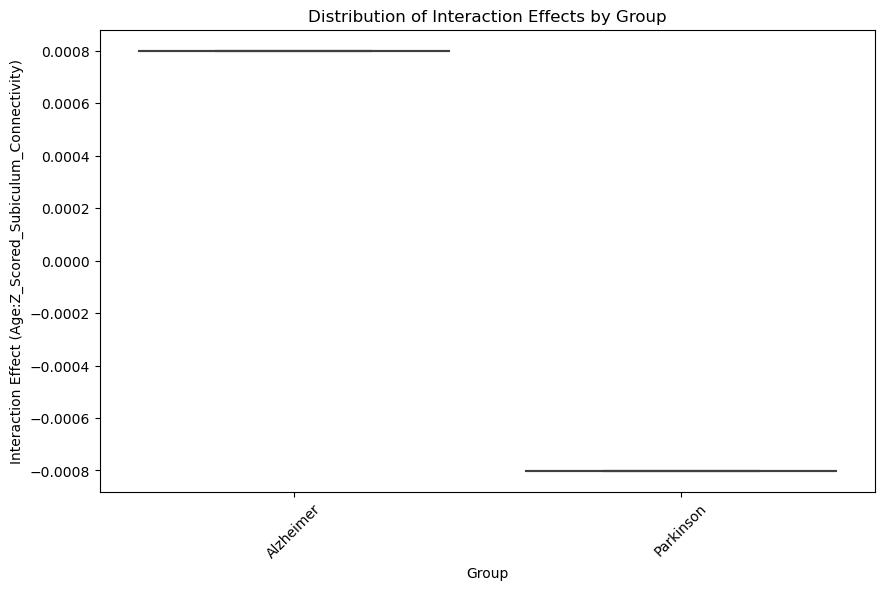

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create an empty list to store interaction effects
interaction_effects = []

# Loop through the groups and extract interaction effects
for group, effects in result.random_effects.items():
    interaction_effect = effects['Age:Z_Scored_Subiculum_Connectivity']
    interaction_effects.append(interaction_effect)

# Create a boxplot with groups side-by-side
plt.figure(figsize=(10, 6))
sns.boxplot(x=list(result.random_effects.keys()), y=interaction_effects)
plt.xlabel('Group')
plt.ylabel('Interaction Effect (Age:Z_Scored_Subiculum_Connectivity)')
plt.title('Distribution of Interaction Effects by Group')
plt.xticks(rotation=45)
plt.show()



Your analysis is done. Enjoy. 
- Calvin Howard